In [ ]:
import hw_02_package as hw
import numpy as np

In [2]:
# Подсчитываем количество NaN значений в каждом столбце
def count_missing_values(df, printMessage: bool):
    missing_values=df.isnull().sum()
    if printMessage == True:
        print("=================================================")
        print("Количество пропущенных значений в каждом столбце:")
        print(missing_values)
    return missing_values

#Подсчёт количества NaN значений в DataFrame
def total_missing_values(df, printMessage: bool):
    total_missing = df.isnull().sum().sum()
    if printMessage == True:
        print("=================================================")
        print("Количество пропущенных значений: ", total_missing)
    return total_missing

In [3]:
df = hw.fetchData.fromCSV()
#df = hw.fetchData.fromAPI();
print(df.columns)

INFO:hw_02_package.fetchData:Fetching file by url on 2025-02-15 Time 19:48:37+00:00 UTC


Index(['Shape', 'Cut', 'Color', 'Clarity', 'Carat Weight',
       'Length/Width Ratio', 'Depth %', 'Table %', 'Polish', 'Symmetry',
       'Girdle', 'Culet', 'Length', 'Width', 'Height', 'Price', 'Type',
       'Fluorescence'],
      dtype='object')


In [4]:
for index, column in enumerate(df.columns):
        print(f"Column {index}: {column}")

Column 0: Shape
Column 1: Cut
Column 2: Color
Column 3: Clarity
Column 4: Carat Weight
Column 5: Length/Width Ratio
Column 6: Depth %
Column 7: Table %
Column 8: Polish
Column 9: Symmetry
Column 10: Girdle
Column 11: Culet
Column 12: Length
Column 13: Width
Column 14: Height
Column 15: Price
Column 16: Type
Column 17: Fluorescence


In [5]:
missing_counts = count_missing_values(df, True)
total_missing_count = total_missing_values(df, True)

Количество пропущенных значений в каждом столбце:
Shape                    5
Cut                   4303
Color                    5
Clarity                  5
Carat Weight             5
Length/Width Ratio       5
Depth %                  7
Table %                 17
Polish                  20
Symmetry                20
Girdle                  22
Culet                 4594
Length                  20
Width                   20
Height                  20
Price                    0
Type                     0
Fluorescence          5264
dtype: int64
Количество пропущенных значений:  14332


In [6]:
numeric_cols = df.select_dtypes(include=[np.number]).columns  # выбираем только числовые столбцы
print("Столбцы с числами: ", numeric_cols)

Столбцы с числами:  Index(['Carat Weight', 'Length/Width Ratio', 'Depth %', 'Table %', 'Length',
       'Width', 'Height', 'Price'],
      dtype='object')


In [7]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())  # заполняем NaN средними значениями
print("DataFrame после замены NaN (столбцах с числами) средними значениями:")
df.head(5)

DataFrame после замены NaN (столбцах с числами) средними значениями:


,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Price,Type,Fluorescence
0,Cushion Modified,Ideal,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,Medium to Thick,NaN,7.09,6.95,4.57,2640,GIA Lab-Grown,NaN
1,Pear,NaN,E,VS1,1.20,1.65,62.5,58.0,Very Good,Very Good,Medium to Thick,NaN,9.64,5.86,3.66,1070,GIA Lab-Grown,NaN
2,Oval,NaN,E,VS1,1.19,1.41,63.1,63.0,Very Good,Very Good,Medium to Thick,NaN,8.44,6.00,3.79,1070,GIA Lab-Grown,NaN
3,Heart,NaN,D,IF,1.00,1.18,61.7,58.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,5.85,6.89,4.25,7110,GIA,Faint
4,Radiant,NaN,H,VS1,1.01,1.35,69.4,66.0,Excellent,Very Good,Thick,NaN,6.80,5.05,3.50,3050,GIA,NaN


In [8]:
missing_counts=count_missing_values(df, True)
total_missing_count_after_replace_NaN = total_missing_values(df, True)
print('Количество замененных NaN', total_missing_count - total_missing_count_after_replace_NaN)

Количество пропущенных значений в каждом столбце:
Shape                    5
Cut                   4303
Color                    5
Clarity                  5
Carat Weight             0
Length/Width Ratio       0
Depth %                  0
Table %                  0
Polish                  20
Symmetry                20
Girdle                  22
Culet                 4594
Length                   0
Width                    0
Height                   0
Price                    0
Type                     0
Fluorescence          5264
dtype: int64
Количество пропущенных значений:  14238
Количество замененных NaN 94


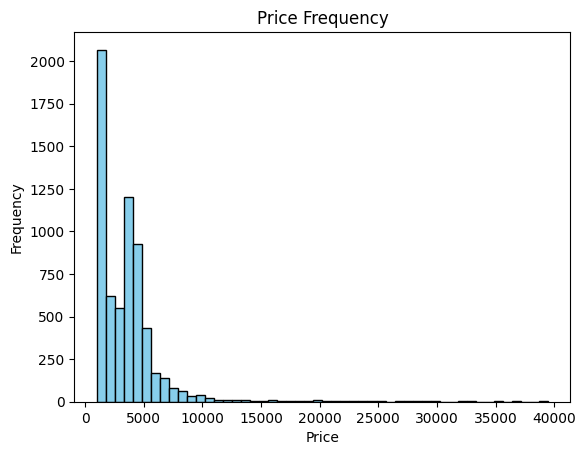

In [10]:
hw.plottingHistogram(df, 'Price', 'Frequency', 'Price Frequency' )

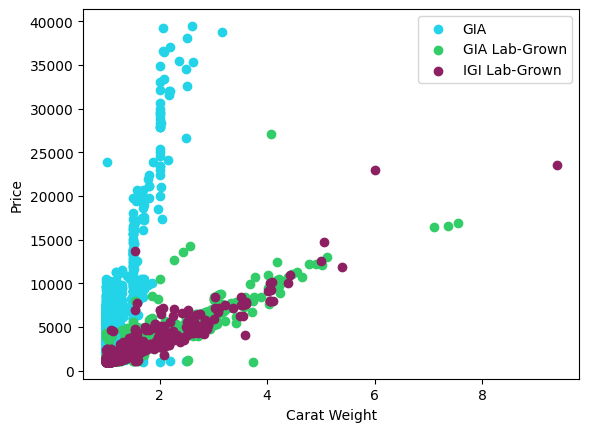

In [11]:
hw.plottingScatter(df)